In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'data/drinks.csv'
drinks = pd.read_csv(file_path)

In [3]:
print(drinks.shape)
print('----------------')
print(drinks.info())
print('----------------')
drinks.describe()

(193, 6)
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None
----------------


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


## 인사이트 발견

In [5]:
# 두 피처 간의 상관 계수 구하기
# beer_servings, wine_servings의 상관 계수
corr = drinks[['beer_servings', 'wine_servings']].corr(method='pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [6]:
# 두 피처의 상관 계수는 0.527 

In [7]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


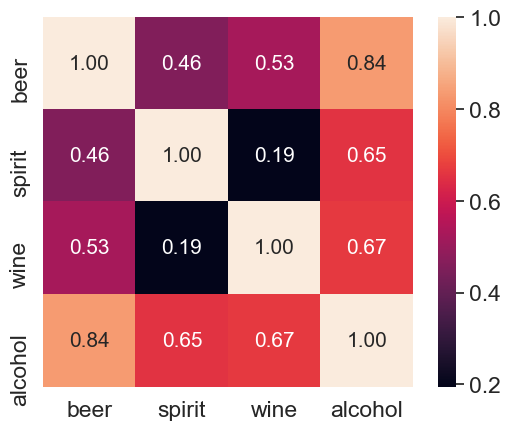

In [8]:
# corr 행렬 히트맵 시각화
# 그래프 출력을 위한 cols 이름을 축약
cols_view = ['beer', 'spirit', 'wine', 'alcohol']

# font_size 1.5로 설정
sns.set(font_scale=1.5)

hm = sns.heatmap(corr.values,
                cbar= True, # 옆에 색상의 변화 바 표현
                annot= True, # 각 색상의 숫자 값
                square= True, 
                fmt= '.2f', # 소수 2째자리까지 표현
                annot_kws= {'size':15},
                yticklabels= cols_view,
                xticklabels= cols_view)

plt.show()

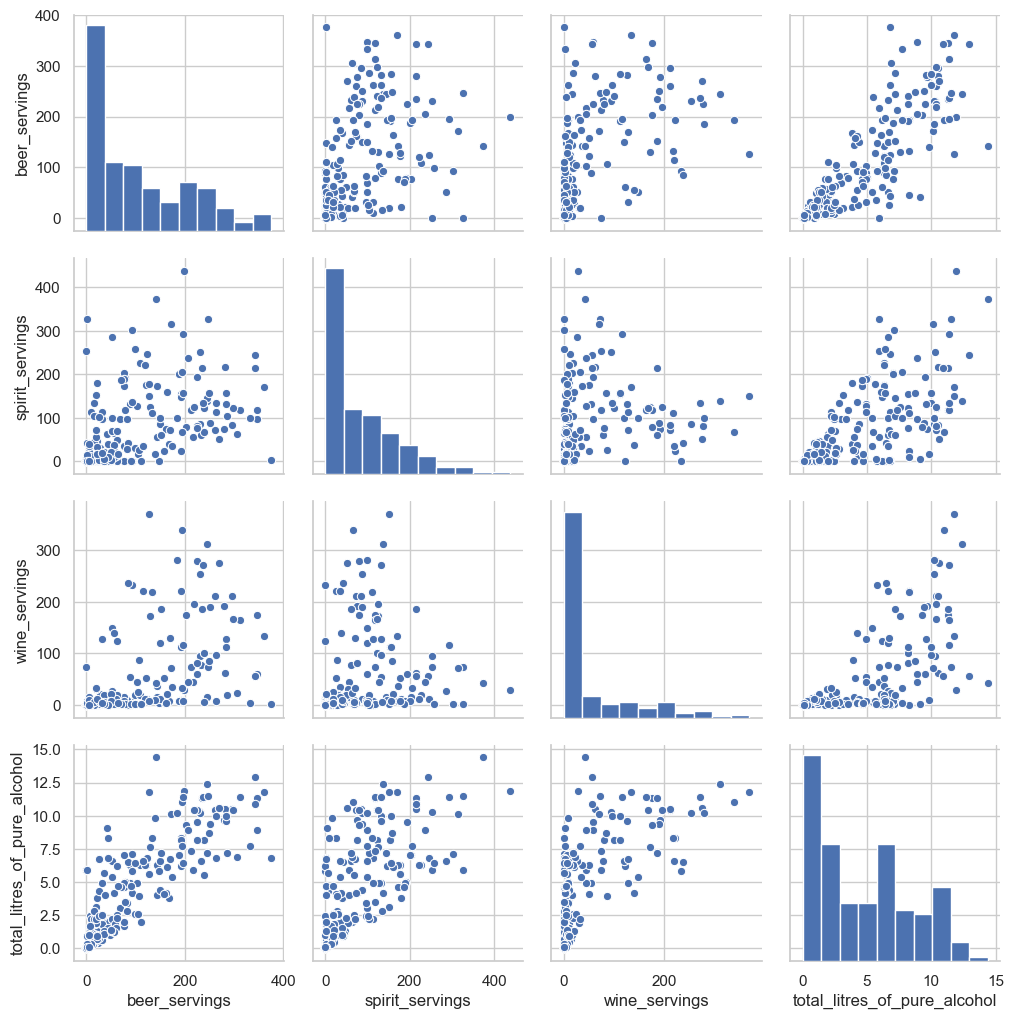

In [9]:
# 시각화 라이브러리를 이용한 피처 간의 산점도 그래프 출력
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[cols], height=2.5)
plt.show()

In [10]:
# 결측 데이터 처리 - 기타 대륙의 통합 : OT
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [11]:
# OT 대륙이 얼마나 차지하고 있는지 파이 차트로 시각화
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()

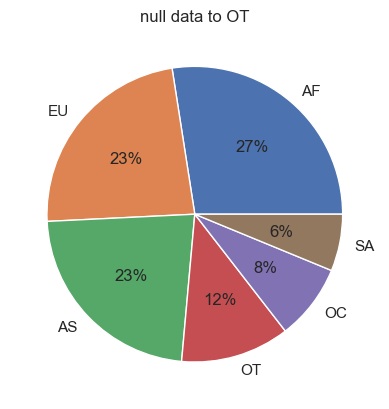

In [12]:
plt.pie(fracs1, labels=labels, 
        autopct='%.0f%%') # 각 도표 몇 퍼센트 차지하는지 표시
plt.title('null data to OT')
plt.show()

In [13]:
# 대륙별 spirit_servings의 통계적 정보는 어느 정도일까
# agg 함수 : apply와 비슷하며 그룹에 대해 파라미터를 입력하는 것만으로 탐색이 가능하다
result = drinks.groupby('continent')['spirit_servings'].agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [14]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙
total_mean = drinks['total_litres_of_pure_alcohol'].mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

In [15]:
result_t = continent_mean[continent_mean >= total_mean]
result_t

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [16]:
# 평균 beer_servings가 가장 높은 대륙
# idxmax : 시리즈 객체에서 가장 큰 index를 반환하는 기능
beer_mean = drinks.groupby('continent')['beer_servings'].mean().idxmax()
beer_mean

'EU'

In [17]:
# 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

In [18]:
rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rects2 = plt.bar(index+bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index+2*bar_width, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index+3*bar_width, sums, bar_width, color='y', label='Sum')

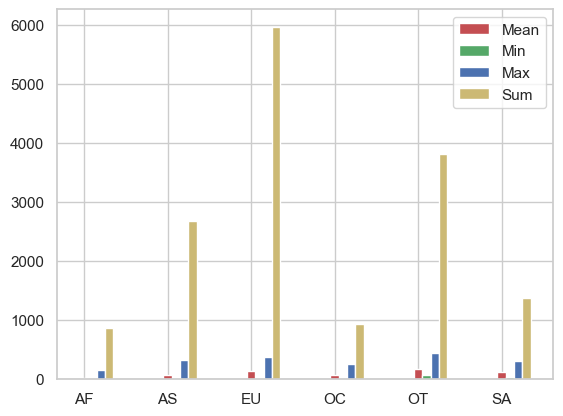

In [19]:
# 해당 index 위치에 들어가는 리스트를 대신함
plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

In [20]:
# 대륙별 total_litres_of_pure_alcohol 시각화
contients = continent_mean.index.tolist()
contients.append('mean')
x_pos = np.arange(len(contients))
alchol = continent_mean.tolist()
alchol.append(total_mean)

In [21]:
bar_list = plt.bar(x_pos, alchol, alpha=0.5)

# 마지막 항목의 색상을 빨간색으로 설정
bar_list[len(contients)-1].set_color('r')

# 0~6 항목, total_mean의 높이만큼 점선 표시
plt.plot([0, 6], [total_mean, total_mean], "k--")

# xticks의 0~6 자리에 해당 나라 이니셜 삽입
plt.xticks(x_pos, contients)

([<matplotlib.axis.XTick at 0x1d8549cd948>,
 <a list of 7 Text xticklabel objects>)

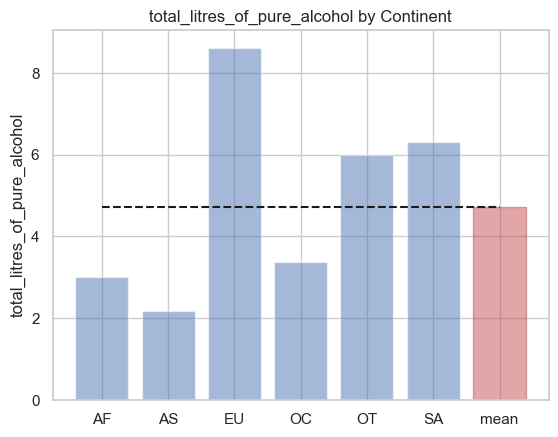

In [22]:
plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

## 통계적 분석

In [23]:
# t-test
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], 
                                     equal_var=False)

print(tTestResult)
print(tTestResultDiffVar)

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)
Ttest_indResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10)


In [24]:
# t-statistic : t-test 검정 통계량을 의미
# 두 집단의 평균이 같다라는 귀무가설이 p-value가 너무 낮아서 기각되었다
# 따라서 두 집단의 평균은 다르다

In [25]:
# 대한민국은 얼마나 술을 독하게 마시는 나라일까
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알코올 비율 피처 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

In [27]:
# 순위 정보 생성
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=False)
country_with_rank.head()

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


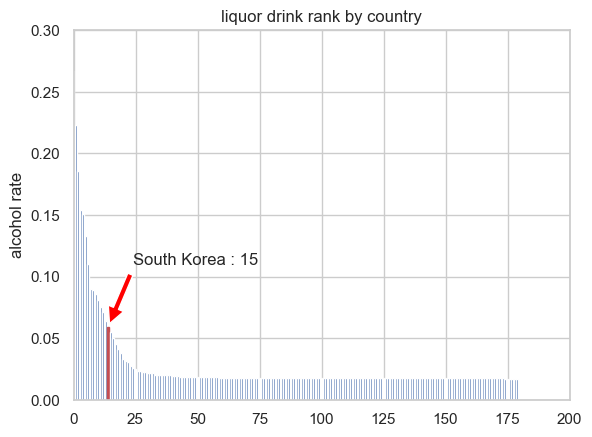

In [45]:
# 시각화
country_list = country_with_rank['country'].tolist()
x_pos = np.arange(len(country_list))
y_pos = country_with_rank['alcohol_rate'].tolist()

# 전체 그래프 시각화
bar_list = plt.bar(x_pos, y_pos)
bar_list[country_list.index("South Korea")].set_color('r')
plt.axis([0, 200, 0, 0.3])

plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')

korea_rank = country_list.index('South Korea')
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]

plt.annotate('South Korea : ' + str(korea_rank + 1), # 기록할 내용
             xy = (korea_rank, korea_alc_rate), # xy 위치
             xytext = (korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops = dict(facecolor = 'red', shrink = 0.05)) 

plt.show()

## 연습문제

In [46]:
drinks = pd.read_csv(file_path)
drinks['continent'] = drinks['continent'].fillna('OT')

In [54]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [52]:
# 대륙별 평균 wine_servings
drinks.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
OT     24.521739
SA     62.416667
Name: wine_servings, dtype: float64

In [53]:
# 국가별 모든 servings의 합을 계산한 total_servings 피처 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

In [66]:
# 전체 평균보다 적은 알코올을 마시는 대륙 중, spirit를 자아 많이 마시는 국가
total_mean = drinks['total_litres_of_pure_alcohol'].mean()
country_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
con = country_mean[country_mean <= total_mean].index.tolist()

# continent안에 con 속의 index가 있는 경우 모두 파악
df_con = drinks.loc[drinks['continent'].isin(con)]
most_spirit = df_con.loc[df_con['spirit_servings'].idxmax()]
most_spirit['country']

'Russian Federation'